<a href="https://colab.research.google.com/github/aakshivora/Student-Performance-Analysis/blob/main/Students_Performance(Mini_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_palette = sns.cubehelix_palette(n_colors = 7, start=.46, rot=-.45, dark = .2, hue=0.95)
my_palette

[[0.743329788947411, 0.902886643645153, 0.8661657334374372],
 [0.5883534510817674, 0.8046491510253367, 0.8175211089156246],
 [0.47913170467460964, 0.6874627025253388, 0.7813776227145972],
 [0.40488446592050553, 0.5490581801229872, 0.7280048241939348],
 [0.3556644272059057, 0.40471674875462244, 0.6382194777308616],
 [0.3086594202144802, 0.2675538040319671, 0.5038901068283317],
 [0.2420928340117253, 0.15282589200689192, 0.33822733215842127]]

In [ ]:
df = pd.read_csv('/content/StudentsPerformance (1).csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [ ]:
df['total score'] = df['math score']+df['reading score']+df['writing score']
print(df['total score'])

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total score, Length: 1000, dtype: int64


In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
9,female,group B,high school,free/reduced,none,38,60,50,148


In [ ]:
df['gender'] = df['gender'].replace({'male': 0, 'female': 1})

In [ ]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [ ]:
df['reading score'].unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40])

In [ ]:
df['writing score'].unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23])

In [ ]:
df['math score'].mean()

66.089

In [ ]:
df['reading score'].mean()

69.169

In [ ]:
df['writing score'].mean()

68.054

In [ ]:
df['total score'].mean()

203.312

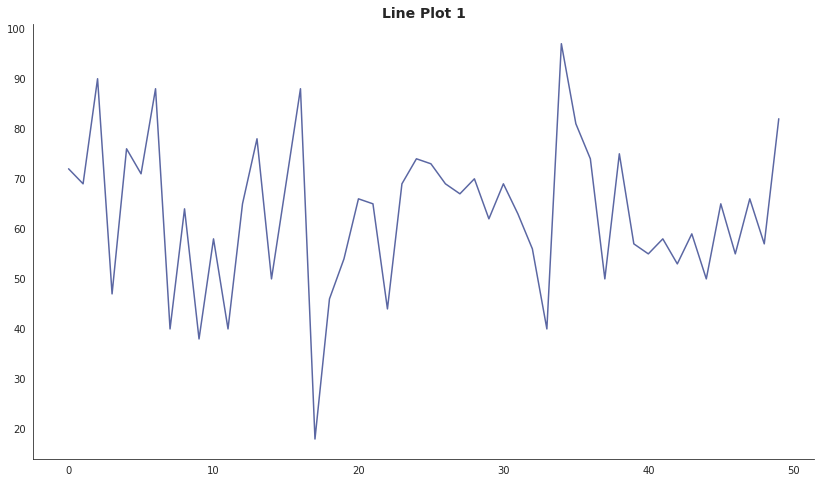

In [ ]:
plt.figure(figsize = (14, 8))
sns.set_style('white')
color = my_palette[4]

plt.plot(df.head(50)["math score"], color = color)
plt.title('Line Plot 1', fontsize = 14, fontweight = 'bold')

sns.despine()
plt.show()

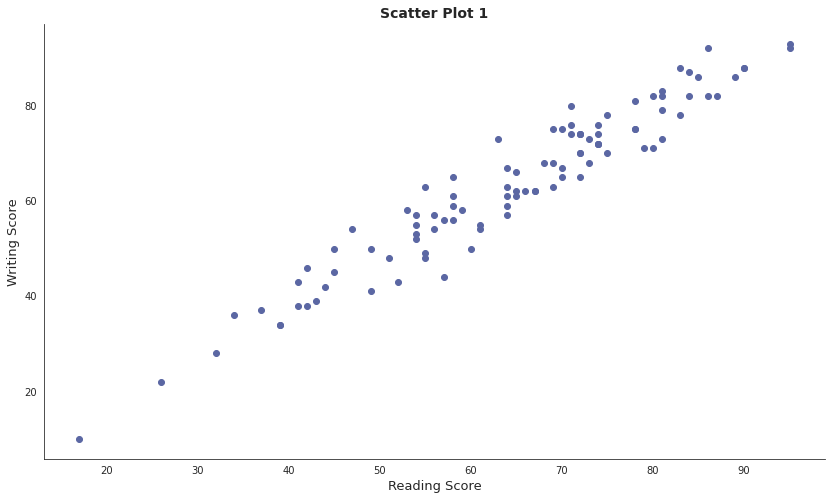

In [ ]:
plt.figure(figsize = (14, 8))
sns.set_style('white')
color = my_palette[4]

plt.scatter(data = df.head(100), x = "reading score", y = "writing score", color = color)
plt.xlabel('Reading Score', fontsize = 13)
plt.ylabel('Writing Score', fontsize = 13)
plt.title('Scatter Plot 1', fontsize = 14, fontweight = 'bold')

sns.despine()
plt.show()

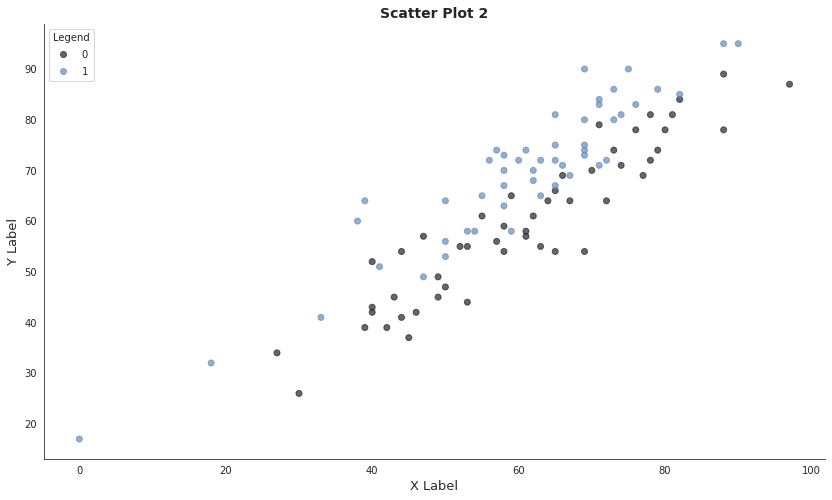

In [ ]:
plt.figure(figsize = (14, 8))
sns.set_style('white')
cmap = sns.dark_palette(my_palette[3], as_cmap=True)

scatter = plt.scatter(data = df.head(100),
            x = "math score",
            y = "reading score",
            c = "gender",
            alpha = 0.7,
            marker = 'o')

scatter.set_cmap(cmap)

plt.xlabel('X Label', fontsize = 13)
plt.ylabel('Y Label', fontsize = 13)

plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Legend')
plt.title('Scatter Plot 2', fontsize = 14, fontweight = 'bold')

sns.despine()
plt.show()

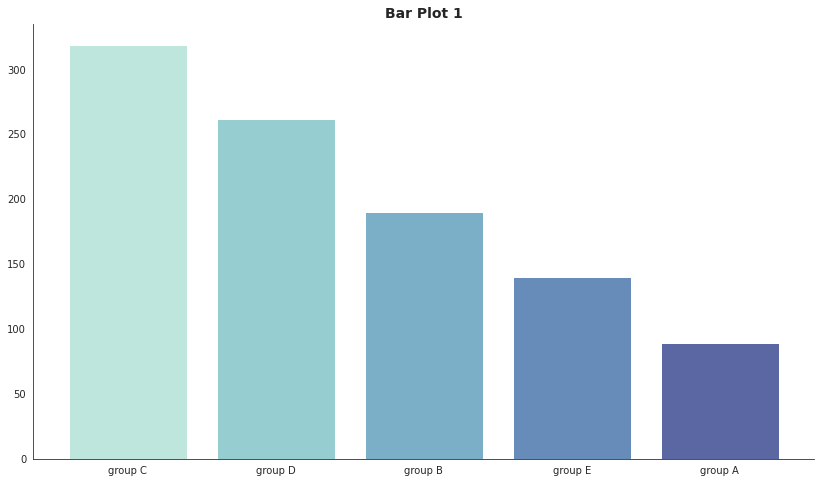

In [ ]:
plt.figure(figsize = (14, 8))
sns.set_style('white')
colors = my_palette

plt.bar(df["race/ethnicity"].value_counts().index,df["race/ethnicity"].value_counts(), color = colors)
plt.title('Bar Plot 1', fontsize = 14, fontweight = 'bold')

sns.despine()
plt.show()

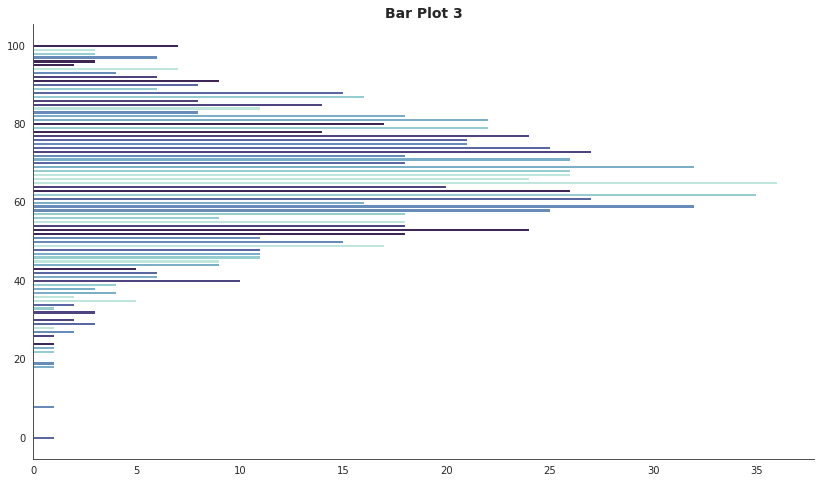

In [ ]:
plt.figure(figsize = (14, 8))
sns.set_style('white')
colors = my_palette

plt.barh(df["math score"].value_counts().index,df["math score"].value_counts(),color = colors)
plt.title('Bar Plot 3', fontsize = 14, fontweight = 'bold')

sns.despine()
plt.show()

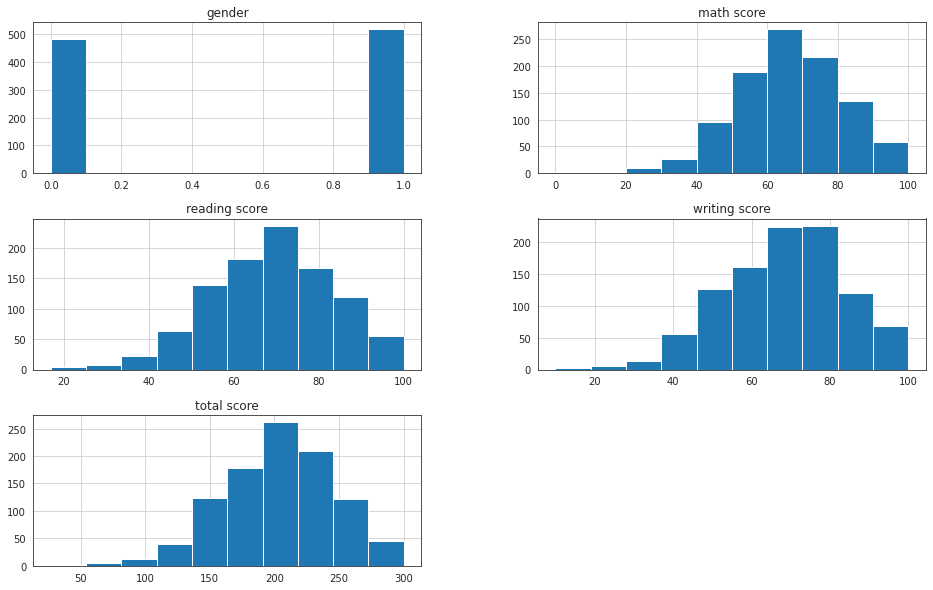

In [ ]:
df.hist(figsize=(16,10));

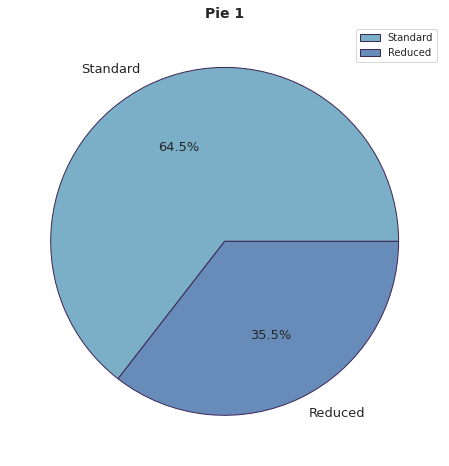

In [ ]:
plt.figure(figsize = (14, 8))
sns.set_style('white')
colors = my_palette
labels = 'Standard', 'Reduced'

plt.pie(df['lunch'].value_counts(),labels = labels,colors = colors[2:],autopct='%1.1f%%', wedgeprops = dict(width=1, edgecolor=colors[6]),textprops = dict(fontsize = '13'))

plt.title('Pie 1', fontsize = 14, fontweight = 'bold')
plt.legend()

sns.despine()
plt.show()